In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf     #Dataset
from tensorflow.keras.models import load_model


In [2]:
start = '2010-01-01'
end = '2026-02-11'
stock = 'GOOG'

data = yf.download(stock, start, end)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2010-01-04,15.494031,15.562261,15.431980,15.498975,78541293
2010-01-05,15.425803,15.520979,15.365236,15.504663,120638494
2010-01-06,15.036937,15.472030,14.989967,15.472030,159744526
2010-01-07,14.686882,15.079950,14.651036,15.065117,257533695
2010-01-08,14.882675,14.913082,14.563524,14.634968,189680313


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2010-01-04,15.494031,15.562261,15.431980,15.498975,78541293
1,2010-01-05,15.425803,15.520979,15.365236,15.504663,120638494
2,2010-01-06,15.036937,15.472030,14.989967,15.472030,159744526
3,2010-01-07,14.686882,15.079950,14.651036,15.065117,257533695
4,2010-01-08,14.882675,14.913082,14.563524,14.634968,189680313
...,...,...,...,...,...,...
4046,2026-02-04,333.339996,344.250000,329.369995,343.755005,36991100
4047,2026-02-05,331.329987,332.644012,306.920013,313.200012,51842000
4048,2026-02-06,323.100006,330.640015,320.149994,327.350006,33877000


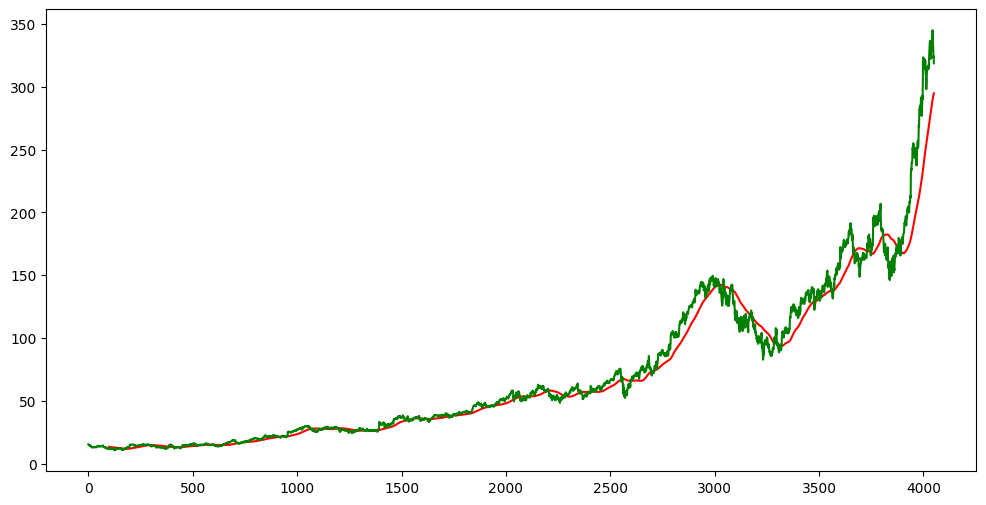

In [5]:
ma_100_days = data.Close.rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')


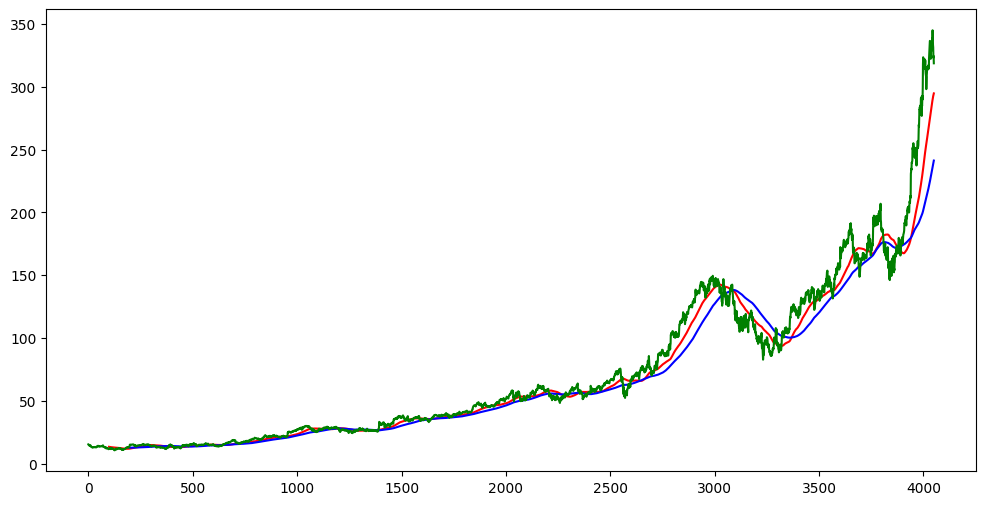

In [6]:
ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')


In [7]:
data.dropna(inplace=True)

In [8]:
data_train = data.Close[0: int(len(data)*0.80)]
data_test = data.Close[int(len(data)*0.80): int(len(data))]

In [9]:
data_train.shape, data_test.shape

((3240, 1), (811, 1))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))


In [11]:
data_train_scaled = scaler.fit_transform(np.array(data_train))


In [12]:
x = []
y = []

for i in range(100, data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i, 0])
    y.append(data_train_scaled[i,0])
    

In [13]:
x,y= np.array(x), np.array(y)

In [14]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

d:\ML Project1\MLSF-2\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(x,y, epochs=50, batch_size=64, verbose=1)

Epoch 1/50


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model.fit(
    x, y,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step - loss: 7.3871e-04 - val_loss: 0.0222
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 225ms/step - loss: 5.8699e-04 - val_loss: 0.0207
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - loss: 5.9813e-04 - val_loss: 0.0205
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 235ms/step - loss: 6.1371e-04 - val_loss: 0.0167
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 20s 250ms/step - loss: 5.7642e-04 - val_loss: 0.0195
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - loss: 5.8009e-04 - val_loss: 0.0191
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 235ms/step - loss: 5.4526e-04 - val_loss: 0.0202
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 21s 268ms/step - loss: 5.7693e-04 - val_loss: 0.0163
Epoch 9/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 323ms/step - loss: 5.4826e-04 - val_loss: 0.0189
Epoch 10/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 323ms/step - loss: 5.4163e-04 - val_loss: 0.0131
Epoch 11/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 318ms/step - loss: 5.3905e-04 - val

In [ ]:
model.fit(
    x, y,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)]
)


Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 27s 337ms/step - loss: 5.4546e-04 - val_loss: 0.0202
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 355ms/step - loss: 5.4788e-04 - val_loss: 0.0178
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 375ms/step - loss: 5.5063e-04 - val_loss: 0.0125
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 376ms/step - loss: 5.5396e-04 - val_loss: 0.0225
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 367ms/step - loss: 5.4763e-04 - val_loss: 0.0198
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 353ms/step - loss: 5.2206e-04 - val_loss: 0.0194
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 347ms/step - loss: 5.4464e-04 - val_loss: 0.0216
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 354ms/step - loss: 5.2643e-04 - val_loss: 0.0237
Epoch 9/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 351ms/step - loss: 5.7423e-04 - val_loss: 0.0278
Epoch 10/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 361ms/step - loss: 5.5884e-04 - val_loss: 0.0254
Epoch 11/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 30s 377ms/step - loss: 5.3015e-04 - val

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)


In [ ]:
data_test_scaled = scaler.transform(np.array(data_test))

In [ ]:
x = []
y = []

for i in range(100, data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100:i, 0])
    y.append(data_test_scaled[i,0])

x,y = np.array(x), np.array(y)

In [ ]:
y_pred = model.predict(x)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step


In [ ]:
scale = 1/scaler.scale_

In [ ]:
y_pred = y_pred * scale
y = y * scale

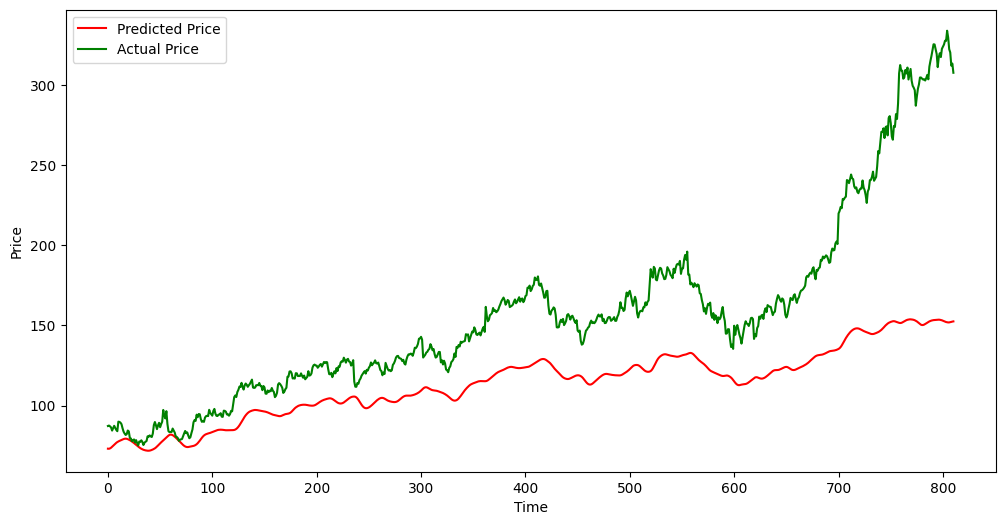

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_pred, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Actual Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [ ]:
model.save('stock_model.keras')